In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error ,r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import time 

In [0]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/team_project/Dataset3.csv', encoding = 'EUC-KR')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data

,NODE_ID,NODE_NAME,SI_CODE,GU_CODE,X,Y,Longitude,Latitude,Radius,trafficlight_num,crosswalk_num,station_num,school_num,land_price,house_1,house_2,house_3,house_4,commerce_1,commerce_2,commerce_3,commerce_4,green_1,green_2,green_3,industry_1,industry_2,industry_3,limit_num,mediansep_,island_num,mean_lanes,mean_speed,mean_wth,mean_loadlen,busstop_num,police_num,CtoC_num,CtoP_num,total_acc
0,1150016800,현대맨션,A,DD,9.419266e+05,1950157.631,126.842562,37.548928,37,0,1,0,0,5.102635e+07,0.996526,0.003474,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.500000,281.000000,0,0,1,0,1
1,1160006100,신흥빌라,A,GG,9.425428e+05,1942717.922,126.850119,37.481912,37,0,1,0,1,2.834985e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,1.00,60.0,4.000000,645.500000,1,0,3,2,5
2,1160035000,연흥학원,A,GG,9.457569e+05,1944979.108,126.886304,37.502487,37,0,1,0,0,8.244801e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.666667,130.333333,0,1,2,3,5
3,1160044000,한일유앤아이아파트,A,GG,9.425526e+05,1945551.749,126.850009,37.507454,37,0,0,0,2,1.929201e+07,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,60.0,3.000000,433.000000,2,0,0,4,4
4,1100025000,연지초교,A,II,9.610632e+05,1959527.770,127.058698,37.634391,37,0,1,1,1,2.064954e+07,0.986185,0.013815,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,2,1.00,30.0,4.500000,616.000000,0,1,7,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,1380028700,-,B,PP,1.147437e+06,1691149.431,129.119698,35.204871,54,9,0,0,0,9.516307e+05,0.000000,0.000000,0.326679,0.000000,0.0,0.0,0.0,0.0,0.673321,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,3.40,56.0,42.225000,7500.000000,0,0,34,3,37
6052,1380029400,-,B,PP,1.147537e+06,1692084.379,129.120957,35.213283,55,12,2,0,0,3.826632e+06,0.000000,0.048482,0.000000,0.000000,0.0,0.0,0.0,0.0,0.064315,0.0,0.0,0.0,0.0,0.0,0.887203,1,2,4.00,52.5,42.225000,7500.000000,0,0,62,4,66
6053,1320005200,-,B,EE,1.142002e+06,1682717.438,129.058556,35.129650,56,0,0,0,0,3.825333e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,1,3.75,57.5,50.000000,3400.000000,0,0,30,10,40
6054,1320004900,-,B,EE,1.141862e+06,1682590.225,129.056998,35.128523,56,0,0,0,0,1.623048e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,0,3.40,52.0,50.000000,3400.000000,0,0,4,1,5


In [0]:
raw_x = data[['trafficlight_num','crosswalk_num','station_num','school_num','land_price','house_1','house_2','house_3','house_4','commerce_1','commerce_2','commerce_3','commerce_4','green_1','green_2','green_3','industry_1','industry_2','industry_3','limit_num','mediansep_','island_num','mean_lanes','mean_speed','mean_wth','mean_loadlen','busstop_num','police_num']]
raw_y = data[['total_acc']]
raw_y_CtoC = data[['CtoC_num']]
raw_y_CtoP = data[['CtoP_num']]

In [0]:
train_x, test_x , train_y, test_y = train_test_split(raw_x, raw_y, test_size = 0.2, random_state = 42)
train_x_CtoC, test_x_CtoC , train_y_CtoC, test_y_CtoC = train_test_split(raw_x, raw_y_CtoC, test_size = 0.2, random_state = 42)
train_x_CtoP, test_x_CtoP , train_y_CtoP, test_y_CtoP = train_test_split(raw_x, raw_y_CtoP, test_size = 0.2, random_state = 42)

In [0]:
model = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.01,
                         max_depth = 10, alpha = 10, n_estimators = 3000)

In [0]:
eval_set = [(test_x, test_y)]

In [0]:
start = time.time()
model.fit(train_x, train_y,eval_set= eval_set ,verbose = False)
print("time: ", time.time() - start ,"seconds")

time:  25.113439321517944 seconds


In [0]:
best_iteration = model.get_booster().best_ntree_limit

In [0]:
best_iteration

3000

In [0]:
predict_y = model.predict(test_x, ntree_limit = best_iteration)

In [0]:
mse = mean_squared_error(test_y,predict_y)
r2 = r2_score(test_y, predict_y)

print(mse)
print(r2)


mse_lst = []
r2_lst = []

print(len(mse_lst))

mse_lst.append(mse)
r2_lst.append(r2)

print('total Mean squared error: ', mse)
print('total R2 score: ', r2)

542.5836637453656
0.698639568596606
0
total Mean squared error:  542.5836637453656
total R2 score:  0.698639568596606


In [0]:
result = pd.concat([test_y.reset_index(drop = True), pd.DataFrame(predict_y)], axis = 1)

In [0]:
result.columns = ['label','predict']

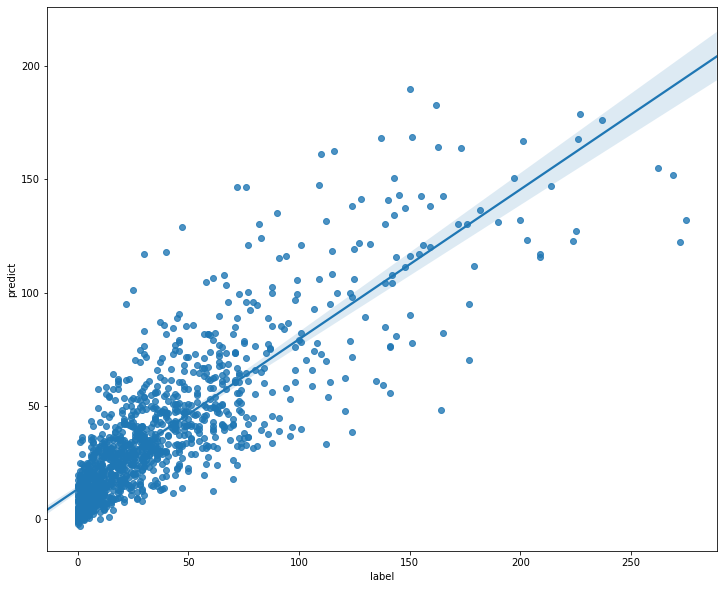

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.regplot(x = 'label', y = 'predict', data = result, ax = ax)

In [0]:
eval_set_CtoC = [(test_x_CtoC, test_y_CtoC)]

start = time.time()
model.fit(train_x_CtoC, train_y_CtoC, eval_set = eval_set_CtoC, verbose = True)
print("time: ", time.time() - start ,"seconds")

[0]	validation_0-rmse:45.4207
[1]	validation_0-rmse:45.1391
[2]	validation_0-rmse:44.8265
[3]	validation_0-rmse:44.4828
[4]	validation_0-rmse:44.1453
[5]	validation_0-rmse:43.8005
[6]	validation_0-rmse:43.6145
[7]	validation_0-rmse:43.3766
[8]	validation_0-rmse:43.1446
[9]	validation_0-rmse:42.9595
[10]	validation_0-rmse:42.6703
[11]	validation_0-rmse:42.4212
[12]	validation_0-rmse:42.2014
[13]	validation_0-rmse:41.9825
[14]	validation_0-rmse:41.7233
[15]	validation_0-rmse:41.4401
[16]	validation_0-rmse:41.2409
[17]	validation_0-rmse:41.009
[18]	validation_0-rmse:40.7175
[19]	validation_0-rmse:40.453
[20]	validation_0-rmse:40.1558
[21]	validation_0-rmse:39.9388
[22]	validation_0-rmse:39.6692
[23]	validation_0-rmse:39.443
[24]	validation_0-rmse:39.2005
[25]	validation_0-rmse:39.0542
[26]	validation_0-rmse:38.9106
[27]	validation_0-rmse:38.6927
[28]	validation_0-rmse:38.4945
[29]	validation_0-rmse:38.3381
[30]	validation_0-rmse:38.1002
[31]	validation_0-rmse:37.8806
[32]	validation_0-rms

In [0]:
best_iteration = model.get_booster().best_ntree_limit
predict_test_y_CtoC = model.predict(test_x_CtoC, ntree_limit = best_iteration)

CtoC_mse = mean_squared_error(test_y_CtoC, predict_test_y_CtoC)
CtoC_r2 = r2_score(test_y_CtoC, predict_test_y_CtoC)

CtoC_mse_lst = []
CtoC_r2_lst = []

CtoC_mse_lst.append(CtoC_mse)
CtoC_r2_lst.append(CtoC_r2)
print('Mean squared error: ', CtoC_mse)
print('R2 score: ', CtoC_r2)

print(len(CtoC_mse_lst))
print('mean of mse: ',np.mean(CtoC_mse_lst))
print('mean of r2: ',np.mean(CtoC_r2_lst))

Mean squared error:  391.74007010305553
R2 score:  0.7000679365124567
1
mean of mse:  391.74007010305553
mean of r2:  0.7000679365124567


In [0]:
eval_set_CtoP = [(test_x_CtoP, test_y_CtoP)]
start = time.time()
model.fit(train_x_CtoP, train_y_CtoP, eval_set = eval_set_CtoP, verbose = True)
print("time: ", time.time() - start ,"seconds")

[0]	validation_0-rmse:12.6386
[1]	validation_0-rmse:12.5618
[2]	validation_0-rmse:12.4895
[3]	validation_0-rmse:12.4134
[4]	validation_0-rmse:12.3386
[5]	validation_0-rmse:12.269
[6]	validation_0-rmse:12.2094
[7]	validation_0-rmse:12.1478
[8]	validation_0-rmse:12.0852
[9]	validation_0-rmse:12.0275
[10]	validation_0-rmse:11.9605
[11]	validation_0-rmse:11.8995
[12]	validation_0-rmse:11.8446
[13]	validation_0-rmse:11.7786
[14]	validation_0-rmse:11.7198
[15]	validation_0-rmse:11.6542
[16]	validation_0-rmse:11.6035
[17]	validation_0-rmse:11.5485
[18]	validation_0-rmse:11.4894
[19]	validation_0-rmse:11.4295
[20]	validation_0-rmse:11.3713
[21]	validation_0-rmse:11.3101
[22]	validation_0-rmse:11.2511
[23]	validation_0-rmse:11.1943
[24]	validation_0-rmse:11.1415
[25]	validation_0-rmse:11.0955
[26]	validation_0-rmse:11.0493
[27]	validation_0-rmse:10.9979
[28]	validation_0-rmse:10.9517
[29]	validation_0-rmse:10.9069
[30]	validation_0-rmse:10.8563
[31]	validation_0-rmse:10.8099
[32]	validation_0-r

In [0]:
best_iteration = model.get_booster().best_ntree_limit
predict_test_y_CtoP = model.predict(test_x_CtoP, ntree_limit = best_iteration)

CtoP_mse = mean_squared_error(test_y_CtoP, predict_test_y_CtoP)
CtoP_r2 = r2_score(test_y_CtoP, predict_test_y_CtoP)

CtoP_mse_lst = []
CtoP_r2_lst = []

CtoP_mse_lst.append(CtoP_mse)
CtoP_r2_lst.append(CtoP_r2)
print('Mean squared error: ', CtoP_mse)
print('R2 score: ', CtoP_r2)

print(len(CtoP_mse_lst))
print('mean of mse: ',np.mean(CtoP_mse_lst))
print('mean of r2: ',np.mean(CtoP_r2_lst))

Mean squared error:  51.73533551457485
R2 score:  0.4325137137319707
1
mean of mse:  51.73533551457485
mean of r2:  0.4325137137319707


In [0]:
combined_result = predict_test_y_CtoC + predict_test_y_CtoP

In [0]:
mse = mean_squared_error(test_y,predict_y)
r2 = r2_score(test_y, predict_y)

mse_lst = []
r2_lst = []

mse_lst.append(mse)
r2_lst.append(r2)

combined_mse = mean_squared_error(test_y, combined_result)
combined_r2 = r2_score(test_y,combined_result)

combined_mse_lst = []
combined_r2_lst = []

combined_mse_lst.append(combined_mse)
combined_r2_lst.append(combined_r2)

print('total Mean squared error: ', mse)
print('total R2 score: ', r2)

print('Combined Mean squared error: ', combined_mse)
print('Combined R2 score: ', combined_r2)

# print(len(mse_lst))
# print('combined mean of mse: ',np.mean(mse_lst))
# print('combined mean of r2: ',np.mean(r2_lst))

total Mean squared error:  542.5836637453656
total R2 score:  0.698639568596606
Combined Mean squared error:  547.5754493118064
Combined R2 score:  0.6958670438187834


In [0]:
# if  "Radius" in raw_x:
#     case1 = mse
#     case2 = combined_mse
#     case3 = 0
#     case4 = 0
# else:    
#     case3 = mse
#     case4 = combined_mse

In [0]:
# x = ['case1', 'case2', 'case3', 'case4']

# y = [case1, case2, case3, case4]

# plt.xlabel('xgboost')
# plt.ylabel('mse')
# plt.bar(x,y,width = 0.7, color = 'green')

In [0]:
# for cases in y:
#     print(cases)

In [0]:
# import matplotlib.pyplot as plt

# x = ['case1', 'case2', 'case3', 'case4']

# y = [573.5592242366071, 566.6153052235197, 562.9589775365101, 551.1482099027847]

# plt.xlabel('xgboost')
# plt.ylabel('mse')
# plt.bar(x,y,width = 0.7, color = 'green')